# Reinforcement Learning

- Notebook Author: Ahmed Métwalli

# Section 1: Advanced AI Roadmap and introduction to Reinforcement learning (Q-Learning)

- In this tutorial, we have an introduction to the advanced AI including roadmap that shows each branch of AI. 
- Moreover, we have hands-on reinforcement learning tutorial to build Q-learning from scratch 

<img src = 'Mindmap.jpg' height = 1000 width = 1200>

## Reinforcement Learning Problem Statment:
Problem Statement:
- We'll use reinforcement learning to train an agent to navigate a grid world and reach a goal.
- The goal is to reach the bottom-right corner of the grid starting from the top-left corner while minimizing the steps (negative rewards) taken. The agent should learn to navigate the grid efficiently to reach the goal with the highest possible cumulative reward.


Key Concepts: 
1. **Environment**:\
The environment is the world in which the agent operates. It includes everything that the agent interacts with, including the state of the world and the rules governing the state transitions. In our example, the environment is the GridWorld.

2. **Grid**:\
The grid is a representation of the environment. It’s a 2D matrix where each cell represents a possible position of the agent. The grid has a start position (top-left corner) and a goal position (bottom-right corner).

3. **Agent**:\
The agent is an entity that interacts with the environment by taking actions. The agent's goal is to learn a policy that maximizes cumulative rewards over time. In our example, the agent moves within the grid to reach the goal.

4. **State**:\
A state is a specific configuration of the environment. In the grid world, a state is the agent's current position within the grid.

5. **Action**:\
An action is a move the agent can make. In our grid world, the actions are moving up, down, left, or right.

6. **Reward**:\
A reward is the feedback the agent receives after taking an action. It can be positive or negative, encouraging the agent to take actions that maximize cumulative rewards. In our grid world, the reward is -1 for each step taken and 10 for reaching the goal.

7. **Policy**:\
A policy is a strategy used by the agent to determine the next action based on the current state. In Q-learning, the policy is derived from the Q-values.

8. **Q-value**:\
The Q-value (quality value) is a measure of the value of a specific action in a specific state, representing the expected cumulative reward of that action.

9. **Exploration vs. Exploitation**:\
Exploration is the act of trying new actions to discover their effects, while exploitation is choosing the best-known action to maximize rewards. The ε-greedy strategy balances exploration and exploitation.

10. **Episodes**:\
Episodes are sequences of states, actions, and rewards that represent one complete experience of the agent interacting with the environment, starting from an initial state and ending when a taerminal state (or goal) is reached. Each episode is essentially a trial or an attempt for the agent to learn from its actions and the resulting outcomes.

- Common Parameters:
    - Common Parameter Values:
    - Learning Rate (alpha): 0.1 (moderate learning speed).
    - Discount Factor (gamma): 0.99 (prioritizes future rewards slightly).
    - Exploration Rate (epsilon): 1.0 (start with high exploration).
    - Epsilon Decay: 0.995 (gradually reduce exploration over episodes).
    - Step Penalty: Keep it minimal to encourage exploration, such as -1 per step.
    - Goal Reward: Typically a large positive reward, such as 100.

### Step 1: Setup Environment
We define a `GridWorld` class to represent our environment. The environment consists of a grid where the agent can move up, down, left, or right. The goal is to reach a specific position in the grid.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the environment: GridWorld
class GridWorld:
    """
    The GridWorld class defines the environment in which the agent operates.
    It simulates a grid-based world where the agent can move in four directions:
    up, down, left, and right. The goal is for the agent to reach the goal position
    while avoiding obstacles.
    
    Attributes:
        grid_size: Tuple representing the dimensions of the grid (rows, columns).
        start: Tuple representing the agent's starting position.
        goal: Tuple representing the goal position.
        obstacles: List of coordinates representing the obstacle positions.
        state: The current position of the agent.
        actions: A list of possible actions: ['up', 'down', 'left', 'right'].
    """
    
    def __init__(self, grid_size= ... , start= ... , goal= ..., obstacles= ...):
        """
        Initializes the GridWorld environment with the specified grid size, start, goal,
        and any obstacles.
        
        Parameters:
            grid_size: The size of the grid, a tuple (rows, columns).
            start: The starting position of the agent as a tuple (row, column).
            goal: The goal position in the grid as a tuple (row, column).
            obstacles: A list of coordinates representing obstacles. If no obstacles are
                       provided, it defaults to an empty list.
        """
        self.grid_size = ...  # Size of the grid (rows x columns)
        self.start = ...  # Agent's starting position
        self.goal = ...  # Goal position the agent must reach
        self.obstacles = obstacles if obstacles else []  # Obstacle positions, if any
        self.state = ...  # Initial state (agent starts at the start position)
        self.actions = ['up', 'down', 'left', 'right']  # List of possible actions

    def reset(self):
        """
        Resets the environment to the starting position of the agent.
        
        Returns:
            The initial state (start position) of the agent.
        """
        self.state = ... # Reset agent's position to the start
        return self.state  # Return the starting state

    def step(self, action):
        """
        Moves the agent based on the action provided.
        The action must be one of 'up', 'down', 'left', or 'right'.
        The method ensures that the agent stays within the grid boundaries and handles
        obstacle collisions.
        
        Parameters:
            action: The direction in which the agent will move ('up', 'down', 'left', 'right').
        
        Returns:
            new_state: The new position of the agent after taking the action.
            reward: The reward for taking that action. +100 for reaching the goal,
                    -1 for each move (small penalty to encourage faster goal-reaching).
            done: A boolean indicating whether the agent has reached the goal (True if goal reached).
        """
        row, col = ...  # Get the current position of the agent (current state)
        
        # Determine the new position based on the action
        if action == 'up':
            row = max(0, row - 1)  # Move up but prevent moving outside the grid
        elif action == 'down':
            row = min(self.grid_size[0] - 1, row + 1)  # Move down, staying within bounds
        elif action == 'left':
            col = max(0, col - 1)  # Move left but stay within bounds
        elif action == 'right':
            col = min(self.grid_size[1] - 1, col + 1)  # Move right, staying in the grid
        
        new_state = ...  # Update the agent's position (hint current row and col)
        
        # Check if the new position is an obstacle; if so, stay in the same place
        if new_state in self.obstacles:
            new_state = ...  # Hit an obstacle, so revert to the previous state (hint use previous state just before obstacle)

        self.state = new_state  # Update the current state to the new state

        # Check if the agent reached the goal
        if self.state == self.goal:
            return new_state, 100, True  # Reward +100 for reaching the goal, episode ends (done=True)
        else:
            return new_state, -1, False  # Small penalty (-1) for each step, episode continues (done=False)

    def render(self):
        """
        Visualizes the current state of the environment as a grid.
        The agent's position, goal, and obstacles are displayed numerically.
        5 represents the agent's current position, 10 represents the goal, and -1 represents obstacles.
        """
        grid = np.zeros(self.grid_size)  # Initialize an empty grid with zeros
        grid[self.goal] = 10  # Mark the goal position as 10
        
        # Mark obstacles as -1
        for obs in self.obstacles:
            grid[obs] = -1  # Obstacles are represented by -1
        
        # Mark the agent's current position as 5
        grid[self.state] = 5  # Agent's position represented by 5
        
        # Print the grid to the console for visualization
        print(grid)


### Step 2: Define the Agent
We define a `QLearningAgent` class that will learn to navigate the grid using Q-learning.
Q-learning is a model-free reinforcement learning algorithm because it does not attempt to build a model of the environment. Instead, it learns an optimal policy directly from the rewards and penalties encountered during interactions with the environment. Model-based methods, on the other hand, involve building and using a model of the environment for planning and decision-making.

#### Q-learning Update Rule:
$$ Q(s, a) \leftarrow Q(s, a) + \alpha \left( r + \gamma \max_{a'} Q(s', a') - Q(s, a) \right) $$

Where:

- $\alpha$ is the learning rate
- $\gamma$ is the discount factor
- r is the reward
- Q(s, a) is the current state-action value
- $\max_{a'} Q(s', a')$ is the maximum future state-action value


<center><img src = 'UpdateRuleExample.png'></center>

In [ ]:
# Q-learning agent
class QLearningAgent:
    """
    The QLearningAgent class implements the Q-learning algorithm.
    It interacts with the GridWorld environment, learning the optimal policy by updating
    its Q-values based on rewards received for actions.
    
    Attributes:
        env: The GridWorld environment the agent interacts with.
        q_table: A table storing Q-values for state-action pairs. Each state has a Q-value for each possible action.
        alpha: Learning rate, controls how much new information overrides old knowledge.
        gamma: Discount factor, determines how much future rewards are considered in current decisions.
        epsilon: Exploration rate, controls the balance between exploration (random actions) and exploitation (greedy actions).
    """
    
    def __init__(self, env, alpha= ... , gamma= ... , epsilon= ...):
        """
        Initializes the Q-learning agent with the environment and Q-learning parameters.
        
        Parameters:
            env: The GridWorld environment.
            alpha: Learning rate (how much the agent learns from new experiences).
            gamma: Discount factor (importance of future rewards).
            epsilon: Exploration rate (probability of taking a random action to explore).
        """
        self.env = env  # The GridWorld environment the agent is interacting with
        self.q_table = np.zeros((*env.grid_size, len(env.actions)))  # Q-table initialized to zeros
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor (how much we value future rewards)
        self.epsilon = epsilon  # Exploration rate (probability of random exploration)

    def choose_action(self, state):
        """
        Chooses an action for the agent using an epsilon-greedy strategy.
        With probability epsilon, it chooses a random action (exploration),
        otherwise it chooses the action with the highest Q-value for the current state (exploitation).
        
        Parameters:
            state: The current position of the agent in the grid.
        
        Returns:
            The action the agent chooses ('up', 'down', 'left', or 'right').
        """
        # Explore with probability epsilon
        if ... < self.epsilon:
            return random.choice(self.env.actions)  # Random action (explore)
        else:
            row, col = state  # Get the agent's current position
            action_index = ...  # Choose the action with the highest Q-value (exploit)
            return self.env.actions[action_index]  # Return the chosen action

    def update_q_value(self, state, action, reward, next_state):
        """
        Updates the Q-value for the given state-action pair using the Q-learning update rule.
        
        Parameters:
            state: The current state (position) of the agent.
            action: The action taken ('up', 'down', 'left', or 'right').
            reward: The reward received after taking the action.
            next_state: The state the agent ends up in after taking the action.
        """
        row, col = state  # Get the current state (row, col)
        next_row, next_col = next_state  # Get the next state (row, col)
        action_index = self.env.actions.index(action)  # Get the index of the action

        # Q-learning update formula:
        # Q(s, a) = Q(s, a) + alpha * [reward + gamma * max(Q(s', a')) - Q(s, a)]
        best_next_action = np.max(...)  # Best Q-value for the next state
        td_target = reward + ... * best_next_action  # Target value (TD target)
        td_error = td_target - ...  # TD error
        self.q_table[row, col, action_index] += self.alpha * td_error  # Update the Q-value with learning rate alpha

    def train(self, episodes=500):
        """
        Trains the agent by letting it interact with the environment over a specified number of episodes.
        In each episode, the agent explores the environment, learns from the rewards, and updates its Q-values.
        
        Parameters:
            episodes: The number of episodes (or iterations) to train the agent for.
        """
        for episode in range(episodes):
            state = ...  # Reset the environment at the start of each episode
            done = False  # The episode continues until the agent reaches the goal
            total_reward = 0  # Track the total reward the agent receives in this episode

            while not ...:
                action = ...  # Choose an action using epsilon-greedy strategy
                next_state, reward, done = self.env.step(action)  # Perform the action and observe the result
                self.update_q_value(state, action, reward, next_state)  # Update Q-values based on the experience
                state = ...  # Move to the next state
                total_reward += ...  # Accumulate the reward

            # Every 10 episodes, print the total reward for monitoring the learning progress
            if episode % 10 == 0:
                print(f'Episode {episode}, Total Reward: {total_reward}')

    def display_policy_arrows(self):
        """
        Displays the learned policy using arrows to represent the best action from each state.
        Arrows are shown on a grid corresponding to the optimal policy for each state.
        Obstacles are shown as '#' and the goal as 'G'.
        """
        directions = {0: '↑', 1: '↓', 2: '←', 3: '→'}  # Map actions to arrows for display
        fig, ax = plt.subplots(figsize=(7, 7))  # Set up the plot with a 7x7 grid

        # Create a grid to visualize obstacles and the goal
        grid = np.zeros(self.env.grid_size)  # Initialize a grid with zeros
        for obs in self.env.obstacles:
            grid[obs] = -1  # Mark obstacles with -1
        grid[self.env.goal] = 10  # Mark the goal with 10

        # Flip the y-axis so that the origin (0,0) is at the bottom-left for visualization
        ax.invert_yaxis()

        # Display the learned policy as arrows
        for row in range(self.env.grid_size[0]):
            for col in range(self.env.grid_size[1]):
                if (row, col) in self.env.obstacles:
                    # Display obstacles as '#'
                    ax.text(col, row, '#', va='center', ha='center', fontsize=24, color='black')
                elif (row, col) == self.env.goal:
                    # Display the goal as 'G'
                    ax.text(col, row, 'G', va='center', ha='center', fontsize=24, color='green')
                else:
                    # Display the best action (as an arrow) for each state
                    action_index = np.argmax(self.q_table[row, col])  # Find the best action from the Q-table
                    ax.text(col, row, directions[action_index], va='center', ha='center', fontsize=24)

        # Format the grid with minor ticks to clearly show each cell boundary
        ax.set_xticks(np.arange(-0.5, self.env.grid_size[1], 1), minor=True)
        ax.set_yticks(np.arange(-0.5, self.env.grid_size[0], 1), minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)  # Draw grid lines
        ax.tick_params(which="minor", size=0)  # Remove tick marks
        plt.xticks([])  # Hide x-axis ticks
        plt.yticks([])  # Hide y-axis ticks
        plt.title("Learned Policy Arrows", fontsize=16)  # Add a title to the plot
        plt.show()  # Display the plot



### Step 3: Training the Agent
We train the agent by running multiple episodes and updating the Q-table.


In [ ]:
class Helper:
    @staticmethod
    def run_pipeline(grid_size = (5,5), start = (0,0), goal = (4,4), obstacles = [(1,1), (2,2), (3,3)],episodes = 50):
        # Create the environment and agent

        env = GridWorld(grid_size=grid_size, start=start, goal=goal, obstacles=obstacles)
        agent = QLearningAgent(env)

        # Train the agent
        agent.train(episodes=episodes)

        # Display the final learned policy as arrows
        agent.display_policy_arrows()

        # Test the agent with the learned policy
        state = env.reset()
        env.render()
        done = False
        while not done:
            action = agent.choose_action(state)
            state, _, done = env.step(action)
            env.render()


Episode 0, Total Reward: -31
Episode 10, Total Reward: 60
Episode 20, Total Reward: 82
Episode 30, Total Reward: 90
Episode 40, Total Reward: 92


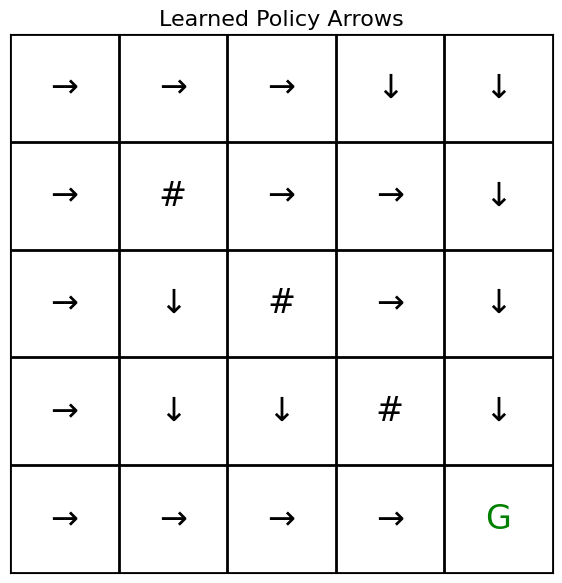

[[ 5.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. 10.]]
[[ 0.  5.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. 10.]]
[[ 0.  0.  5.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. 10.]]
[[ 0.  0.  5.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. 10.]]
[[ 0.  0.  0.  5.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. 10.]]
[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  5.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. 10.]]
[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  5.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. 10.]]
[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  5.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. 10.]]
[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 

In [ ]:
Helper.run_pipeline()